In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset('mpg').dropna()  # Or use a public Boston housing CSV if needed
df.head()



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# Keep only numeric columns for X
X = df.drop(['mpg'], axis=1)
X = X.select_dtypes(include=[np.number])  # Drop any non-numeric columns

# Normalize numeric features
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

X = normalize(X)
y = df['mpg'].values
X = X.values


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
class LinearRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.X = np.c_[np.ones(X.shape[0]), X]  # Add bias
        self.y = y
        self.theta = np.zeros(self.X.shape[1])

        for _ in range(self.epochs):
            gradient = -2 * self.X.T.dot(self.y - self.X.dot(self.theta)) / len(self.y)
            self.theta -= self.lr * gradient

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X.dot(self.theta)


In [7]:
def evaluate_model(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    r2 = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
    return rmse, r2


In [8]:
lr = LinearRegressionScratch()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

rmse_lr, r2_lr = evaluate_model(y_test, pred_lr)

print(f"📘 Linear Regression - RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}")


📘 Linear Regression - RMSE: 3.80, R²: 0.72


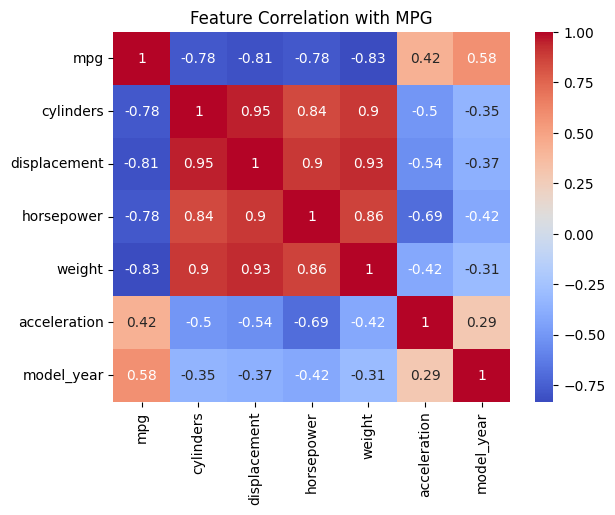

In [10]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with MPG")
plt.show()
